In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

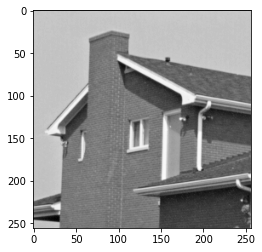

In [43]:
img= cv2.imread('4.1.05.tiff',0)
height,width=img.shape
# fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(111)
plt.imshow(img,'gray')

In [44]:
lenna=cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_CONSTANT,value=0)
arr=np.asarray(lenna)

In [45]:
kernel=np.array([[1,4,6,4,1],
                [4,16,24,16,4],
                [6,24,36,24,6],
                [4,16,24,16,4],
                [1,4,6,4,1]])

sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

blur=np.zeros(img.shape,dtype='uint8')
sobel=np.zeros(img.shape)

Text(0.5, 1.0, 'Blur Image')

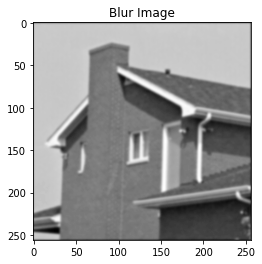

In [46]:
for i in range(height):
    for j in range(width):
        blur[i,j]=int(np.sum(arr[i:i+5 , j:j+5]*kernel)/np.sum(kernel))
plt.imshow(blur,'gray')
plt.title("Blur Image")

In [47]:
sb_i=cv2.copyMakeBorder(blur,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
sx=np.zeros(img.shape)
sy=np.zeros(img.shape)

for i in range(height):
    for j in range(width):
        sx[i,j]=np.sum(sb_i[i:i+3, j:j+3]*sobel_x)
        sy[i,j]=np.sum(sb_i[i:i+3, j:j+3]*sobel_y)
        
        sobel[i,j]=round(math.sqrt(sy[i,j]*sy[i,j] + sx[i,j]*sx[i,j]))

for i in range(height):
    for j in range(width):
        sobel[i,j]=sobel[i,j] / sobel.max() *255

theta = np.arctan2(sy, sx)


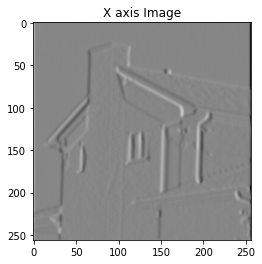

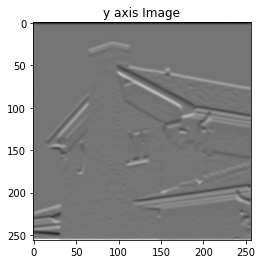

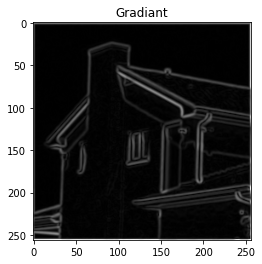

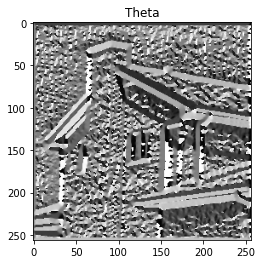

In [48]:
# theta=theta.round()
# sobel=sobel.round()
# print(sx)
# print(sy)
# print(theta)
# print(sobel)
plt.imshow(sx,'gray')
plt.title("X axis Image")
plt.show()
plt.imshow(sy,'gray')
plt.title("y axis Image")
plt.show()
plt.imshow(sobel,'gray')
plt.title("Gradiant")
plt.show()
plt.imshow(theta,'gray')
plt.title("Theta")
plt.show()

In [49]:
print(theta)
print(sobel)

[[-0.85113403 -1.38590931 -1.5379929  ... -1.60502952 -1.76015112
  -2.29396963]
 [-0.3951968  -1.09538455 -1.4777326  ... -1.66862626 -2.05308979
  -2.74586232]
 [-0.14017884 -0.58375634 -1.29824845 ... -1.85482893 -2.55569089
  -2.99628264]
 ...
 [ 0.03916719  0.17909477  0.80761673 ...  0.32932617  1.01219701
   3.12604986]
 [ 0.21339419  0.78539816  1.39513647 ...  0.90837003  1.45209099
   2.91065989]
 [ 0.78539816  1.35740213  1.53162914 ...  1.41514262  1.55365515
   2.29529428]]
[[146.26903553 172.48096447 187.36675127 ... 188.98477157 173.77538071
  147.23984772]
 [184.13071066 122.96954315 121.99873096 ... 122.64593909 124.26395939
  185.4251269 ]
 [212.93147208  84.4606599   54.04187817 ...  54.36548223  85.43147208
  214.54949239]
 ...
 [248.51694915  85.          23.05084746 ...  29.8940678    6.84322034
  139.02542373]
 [229.4279661  106.61016949  84.63983051 ...  45.74152542  39.61864407
  130.74152542]
 [205.65677966 229.4279661  248.51694915 ... 239.7        255.
  255

In [50]:
angle = theta * 180. / np.pi
angle[angle < 0] += 180
print(angle)

[[131.23361203 100.59324561  91.87949794 ...  88.03858233  79.15076927
   48.56522193]
 [157.35689133 117.23908808  95.33215888 ...  84.39475753  62.36661988
   22.67367822]
 [171.96834391 146.55322519 105.61584287 ...  73.72613067  33.56969842
    8.32565033]
 ...
 [  2.24411452  10.26137472  46.27303002 ...  18.86899946  57.99461679
  179.10946375]
 [ 12.22658673  45.          79.93543179 ...  52.04576912  83.19868518
  166.76852726]
 [ 45.          77.77341327  87.75588548 ...  81.08169933  89.01788284
  131.51067509]]


In [51]:
n_m_s=np.zeros(img.shape, dtype=np.int32)

for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
        try:
            q = 255
            r = 255
            
            #angle 0
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = sobel[i, j+1]
                r = sobel[i, j-1]
            #angle 45
            elif (22.5 <= angle[i,j] < 67.5):
                q = sobel[i+1, j-1]
                r = sobel[i-1, j+1]
            #angle 90
            elif (67.5 <= angle[i,j] < 112.5):
                q = sobel[i+1, j]
                r = sobel[i-1, j]
            #angle 135
            elif (112.5 <= angle[i,j] < 157.5):
                q = sobel[i-1, j-1]
                r = sobel[i+1, j+1]

            if (sobel[i,j] >= q) and (sobel[i,j] >= r):
                n_m_s[i,j] = sobel[i,j]
            else:
                n_m_s[i,j] = 0

        except IndexError as e:
            pass

Text(0.5, 1.0, 'Non Max Supression')

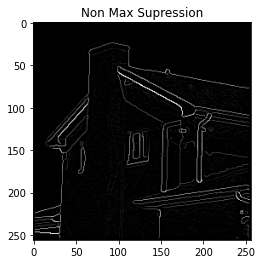

In [52]:
plt.imshow(n_m_s,'gray')
plt.title("Non Max Supression")

In [60]:
weak = np.int32(25)
strong = np.int32(255)
highThreshold = n_m_s.max() * 0.09
lowThreshold = highThreshold * 0.05

dub_thres=np.zeros(img.shape,dtype=np.int32)

strong_i, strong_j = np.where(n_m_s >= highThreshold)
zeros_i, zeros_j = np.where(n_m_s < lowThreshold)

weak_i, weak_j = np.where((n_m_s <= highThreshold) & (n_m_s >= lowThreshold))

dub_thres[strong_i, strong_j] = strong
dub_thres[weak_i, weak_j] = weak

Text(0.5, 1.0, 'Double Threshold')

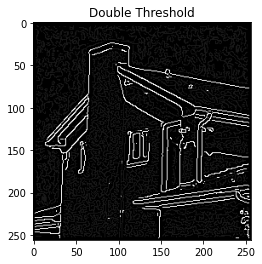

In [62]:
plt.imshow(dub_thres,'gray')
plt.title("Double Threshold")

In [63]:
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        if (dub_thres[i,j] == weak):
            try:
                if ((dub_thres[i+1, j-1] == strong) or (dub_thres[i+1, j] == strong) or (dub_thres[i+1, j+1] == strong) 
                or (dub_thres[i, j-1] == strong) or (dub_thres[i, j+1] == strong) or (dub_thres[i-1, j-1] == strong) 
                or (dub_thres[i-1, j] == strong) or (dub_thres[i-1, j+1] == strong)):
                    dub_thres[i, j] = strong
                else:
                    dub_thres[i, j] = 0
            except IndexError as e:
                pass

Text(0.5, 1.0, 'Final Image of Canny Edge Detection')

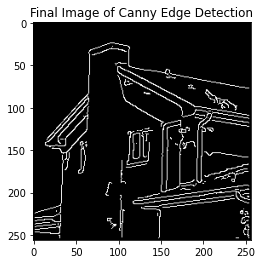

In [64]:
plt.imshow(dub_thres,'gray')
plt.title("Final Image of Canny Edge Detection")